# Fundamentals of Machine Learning
## Kavindu Jointe | IMDD-D02
Master Data-Driven Design

University of Applied Science Utrecht

Week 5: Machine Learning 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [2]:
#View dataframe
df = pd.read_csv("voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
#view data types
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [4]:
optimized_df = df.replace({'male':1, 'female':0})
optimized_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


Text(0.5, 1.0, 'Correlation Research via Heatmap')

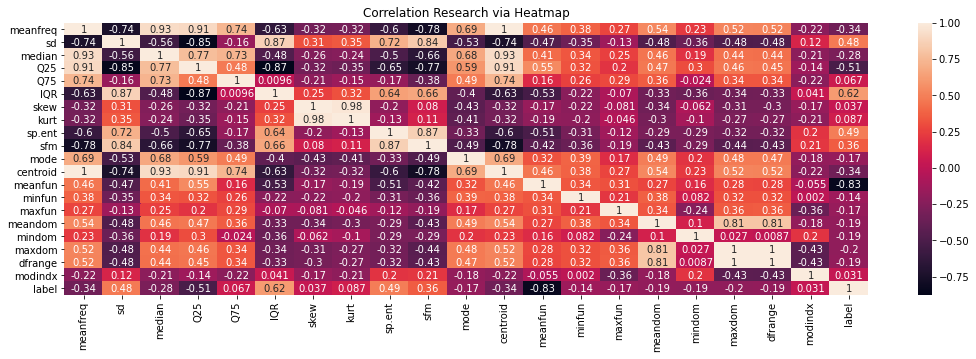

In [5]:
plt.figure(figsize=(18,5)) #resize heatmap
Var_Corr = optimized_df.corr()
# plot the heatmap and annotation
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True).set_title('Correlation Research via Heatmap')

In [9]:
#Select 7 variables based on correlation and create new df 
df = optimized_df[["sd", "IQR", "sp.ent", "meanfun", "mode", "sfm", "Q25","label" ]]
df.head()

,sd,IQR,sp.ent,meanfun,mode,sfm,Q25,label
0,0.064241,0.075122,0.893369,0.084279,0.000000,0.491918,0.015071,1
1,0.067310,0.073252,0.892193,0.107937,0.000000,0.513724,0.019414,1
2,0.083829,0.123207,0.846389,0.098706,0.000000,0.478905,0.008701,1
3,0.072111,0.111374,0.963322,0.088965,0.083878,0.727232,0.096582,1
4,0.079146,0.127325,0.971955,0.106398,0.104261,0.783568,0.078720,1


In [10]:
from sklearn.ensemble import RandomForestClassifier
X = df.iloc[:, 0:7].values
y = df.iloc[:, 7].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

RFC = RandomForestClassifier(n_estimators = 50)
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [11]:
prediction = RFC.predict(X_test)
from sklearn import metrics
precision = metrics.precision_score(y_test,prediction)
recall = metrics.recall_score(y_test,prediction)

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, prediction)
print(conf_mat)

print (precision, recall)
print( "reported: ", sum(prediction), ' and total:', len(prediction))

[[451   6]
 [ 10 484]]
0.9877551020408163 0.979757085020243
reported:  490  and total: 951
